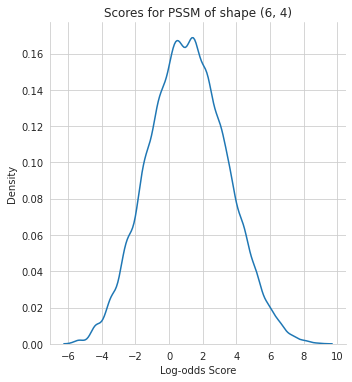

In [1]:
# Calculate distribution of all possible scores of a motif
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import numpy as np
from scipy.stats import norm
%matplotlib inline

def density_plot(distribution, smoothness=0.5):

    sns.set_style("whitegrid")
    p = sns.displot(distribution, kind="kde",bw_adjust=smoothness)
    p.set(xlabel="Log-odds Score", title=f"Scores for PSSM of shape {matrix.shape}")
    plt.show()
    
def calculate_all_possible_scores(matrix, smoothness):

    iterator = range(4)
    motif_len = len(matrix)

    cartesian_product = list(itertools.product(iterator, repeat=motif_len))

    scores = []
    for c in cartesian_product:
        score = 0
        for i, pos in zip(range(len(c)),c):
            x = matrix[i][pos]

            score += x
        scores.append(score)

    density_plot(scores, smoothness)  
    return scores


matrix = np.array([[0.68, -0.32, 1.26, -0.32],
                   [-1.32, 1.49, -0.32, 0.68],
                   [-0.32, 0.26, -1.32, 1.68],
                   [0.26, 0.26, 0.26, 1],
                   [-0.32, 0.26, -1.32, 1.68],
                   [-0.32, 0.26, -1.32, 1.68]], dtype="float16")

all_scores = calculate_all_possible_scores(matrix, 0.7)









def get_cdf_from_distribution(distribution, plot=False):
    mean = np.mean(distribution)
    std = np.mean(distribution)
    cdf = norm.cdf(distribution, mean, std)
    if plot:
        density_plot(distribution, smoothness=0.5)



cdf = get_cdf_from_distribution(all_scores)



[[-0.37726061 -0.91174917  1.16789334 -1.0169314 ]
 [ 1.54570362 -1.63893028 -1.66297576 -1.74411252]
 [-4.95212257  2.03357456 -4.82659169 -4.90772845]
 [-4.95212257 -4.80254621  2.00952909 -4.90772845]
 [ 1.8839982  -4.80254621 -4.82659169 -4.90772845]
 [-4.95212257  2.03357456 -4.82659169 -4.90772845]
 [-0.78996638 -2.05777004  1.59877583 -2.16295227]]
12.273049190211287


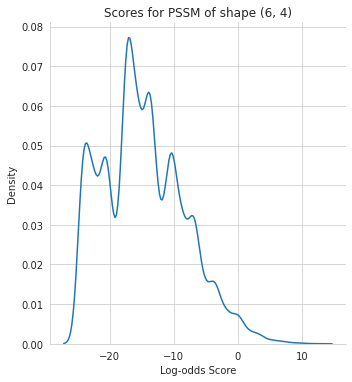

In [2]:
import math
#MOTIF ENSG00000115875 RNAcompete
#letter-probability matrix: alength= 4 w= 7

#pval: 5.61e-05; match:GACGACG
array = np.array([[0.203253094216, 0.126506578204, 0.543733751829, 0.126506578204],
                  [0.77073854682, 0.076420483562, 0.076420483562, 0.076420483562],
                  [0.00852837899557, 0.974414859209, 0.00852837899557, 0.00852837899557],
                  [0.00852837899557, 0.00852837899557, 0.974414859209, 0.00852837899557],
                  [0.974414859209, 0.00852837899557, 0.00852837899557, 0.00852837899557],
                  [0.00852837899557, 0.974414859209, 0.00852837899557, 0.00852837899557],
                  [0.152686398834, 0.0571645056273, 0.732984592797, 0.0571645056273]])

bg = [0.264,0.238,0.242, 0.256]
for i,nuc in enumerate(array.T):
    array.T[i] = np.log2(nuc/bg[i])
    
    
print(array)
score=0
match = np.array([3,1,2,3,1,2,3]) - 1

for i,line in enumerate(array):
    dig = match[i]
    score += array[i][dig]
    #print(array[i][dig])
    
print(score)

distribution = calculate_all_possible_scores(array, 0.9)

def score_to_pvalue(score):
    score = 2**score
    
    p = score/(score+1)

    return 1-p

#score_to_pvalue(score)
# 0.0000561

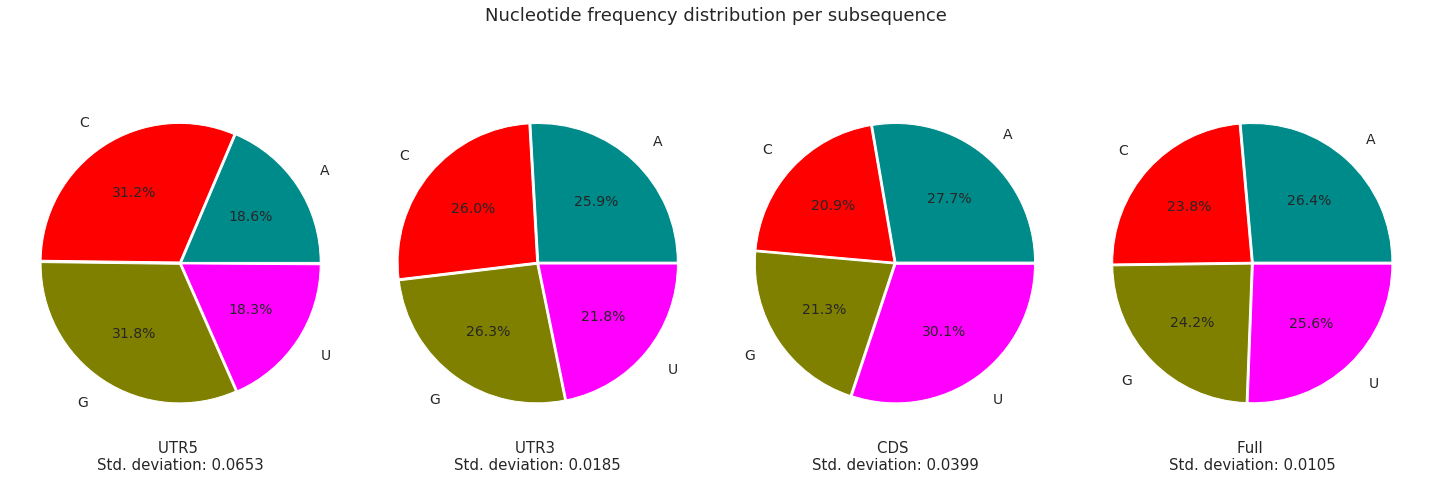

In [97]:
# utr5_distribution = [0.186, 0.312, 0.318, 0.183]
cds_distribution = [0.259,0.260,0.263,0.218]
utr3_distribution = [0.277,0.209,0.213,0.301]
full_distribution = [0.264,0.238,0.242, 0.256]

dists = [utr5_distribution, cds_distribution, utr3_distribution, full_distribution]
stds = map(np.std, dists)
stds = [round(x, 4) for x in stds]

names = ["A", "C", "G", "U"]

explode = [0.01]*4
subseqs = ["UTR5", "UTR3", "CDS", "Full"]
colors = ["darkcyan", "red", "olive", "magenta"]
fig, ax = plt.subplots(1, 4, figsize=(20,7))
fig.suptitle("Nucleotide frequency distribution per subsequence", size=18)
for i,dist in enumerate(dists):
    ax[i].pie(x=dist, 
              colors=colors, 
              explode=explode,
              normalize=False, 
              labels=names, 
              textprops={'fontsize': 14}, 
              autopct='%0.01f%%', 
              pctdistance=0.6, 
              labeldistance=1.2)
    
    ax[i].set_xlabel(f"{subseqs[i]} \nStd. deviation: {stds[i]}", size=15)
plt.tight_layout()
fig.savefig("Pie_plot_nucleotide_distributions.png")
plt.show()

ATtRACT_db.txt			       FIMO_input	    SELEX2020_db.txt
ATtRACT_ppm.txt			       MANE		    SELEX2020_ppm.txt
FIMO_1e-3_2ndorder_full_transc_bg.png  OLDSELEX2020_db.txt
FIMO_OUT			       RBNS2018_db.txt
